**Đề tài: Transfer Learning Model for Image Classification**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Đường dẫn đến tệp ZIP và thư mục đích
zip_path = '/content/drive/MyDrive/Data_ChestXRay.zip'
extracted_path = '/content/Data_ChestXRay'

# Giải nén tệp ZIP bằng lệnh !unzip
!unzip {zip_path} -d {extracted_path}

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.model_selection import train_test_split
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import torch.nn as nn
import torch.optim as optim
from shutil import copyfile
from sklearn.metrics import confusion_matrix, classification_report

Kiểm tra số lượng của bộ dataset vừa được tải lên

In [ ]:
print("Tổng 2 bộ dataset Normal và Tuberculosis")
print(len(os.listdir('/content/Data_ChestXRay/TB_Chest_Radiography_Database/Normal'))+len(os.listdir('/content/Data_ChestXRay/TB_Chest_Radiography_Database/Tuberculosis')))

Tổng 2 bộ dataset Normal và Tuberculosis
4200


In ra kiểm tra thông tin 10 ảnh đầu tiên trong thư mục normal và tuberculosis

In [ ]:
# Đường dẫn đến thư mục chứa các ảnh
folder_path = '/content/Data_ChestXRay/TB_Chest_Radiography_Database/Normal'

# Lấy danh sách các tệp tin trong thư mục
file_list = os.listdir(folder_path)

# Biến đếm số lượng ảnh đã đọc
num_images_to_read = 10
count = 0

print(f'Kiểm tra thông số 10 ảnh trong mục Normal:\n')

# Lặp qua từng tệp tin và đọc 10 ảnh đầu tiên
for file_name in file_list:
    # Đường dẫn đầy đủ đến từng tệp tin
    file_path = os.path.join(folder_path, file_name)

    try:
        # Mở ảnh để đọc thông tin
        with Image.open(file_path) as img:
            # Lấy kích thước của ảnh
            width, height = img.size

            # Hiển thị thông tin kích thước
            print(f'Tên tệp tin: {file_name}')
            print(f'Kích thước ảnh: {width} x {height} pixels')
            print('\n' + '='*30 + '\n')

            # Tăng biến đếm
            count += 1

            # Kiểm tra nếu đã đọc đủ 10 ảnh
            if count == num_images_to_read:
                break

    except Exception as e:
        print(f'Không thể đọc thông tin của tệp tin {file_name}: {str(e)}')


Kiểm tra thông số 10 ảnh trong mục Normal:

Tên tệp tin: Normal-3331.png
Kích thước ảnh: 512 x 512 pixels


Tên tệp tin: Normal-1960.png
Kích thước ảnh: 512 x 512 pixels


Tên tệp tin: Normal-658.png
Kích thước ảnh: 512 x 512 pixels


Tên tệp tin: Normal-554.png
Kích thước ảnh: 512 x 512 pixels


Tên tệp tin: Normal-408.png
Kích thước ảnh: 512 x 512 pixels


Tên tệp tin: Normal-3027.png
Kích thước ảnh: 512 x 512 pixels


Tên tệp tin: Normal-1930.png
Kích thước ảnh: 512 x 512 pixels


Tên tệp tin: Normal-425.png
Kích thước ảnh: 512 x 512 pixels


Tên tệp tin: Normal-989.png
Kích thước ảnh: 512 x 512 pixels


Tên tệp tin: Normal-1550.png
Kích thước ảnh: 512 x 512 pixels




In [ ]:
# Đường dẫn đến thư mục chứa các ảnh
folder_path = '/content/Data_ChestXRay/TB_Chest_Radiography_Database/Tuberculosis'

# Lấy danh sách các tệp tin trong thư mục
file_list = os.listdir(folder_path)

# Biến đếm số lượng ảnh đã đọc
num_images_to_read = 10
count = 0

print(f'Kiểm tra thông số 10 ảnh trong mục Tuberculosis:\n')

# Lặp qua từng tệp tin và đọc 10 ảnh đầu tiên
for file_name in file_list:
    # Đường dẫn đầy đủ đến từng tệp tin
    file_path = os.path.join(folder_path, file_name)

    try:
        # Mở ảnh để đọc thông tin
        with Image.open(file_path) as img:
            # Lấy kích thước của ảnh
            width, height = img.size

            # Hiển thị thông tin kích thước
            print(f'Tên tệp tin: {file_name}')
            print(f'Kích thước ảnh: {width} x {height} pixels')
            print('\n' + '='*30 + '\n')

            # Tăng biến đếm
            count += 1

            # Kiểm tra nếu đã đọc đủ 10 ảnh
            if count == num_images_to_read:
                break

    except Exception as e:
        print(f'Không thể đọc thông tin của tệp tin {file_name}: {str(e)}')

Kiểm tra thông số 10 ảnh trong mục Tuberculosis:

Tên tệp tin: Tuberculosis-182.png
Kích thước ảnh: 512 x 512 pixels


Tên tệp tin: Tuberculosis-536.png
Kích thước ảnh: 512 x 512 pixels


Tên tệp tin: Tuberculosis-456.png
Kích thước ảnh: 512 x 512 pixels


Tên tệp tin: Tuberculosis-58.png
Kích thước ảnh: 512 x 512 pixels


Tên tệp tin: Tuberculosis-535.png
Kích thước ảnh: 512 x 512 pixels


Tên tệp tin: Tuberculosis-17.png
Kích thước ảnh: 512 x 512 pixels


Tên tệp tin: Tuberculosis-617.png
Kích thước ảnh: 512 x 512 pixels


Tên tệp tin: Tuberculosis-446.png
Kích thước ảnh: 512 x 512 pixels


Tên tệp tin: Tuberculosis-259.png
Kích thước ảnh: 512 x 512 pixels


Tên tệp tin: Tuberculosis-299.png
Kích thước ảnh: 512 x 512 pixels




Trước khi bắt đầu huấn luyện model, cần phải có các tập như tập train, test, val nên bước đầu tiên là trộn lại bộ dataset lớn nhất để chia ra tập train và tập test đầu tiên.

In [ ]:
def shuffle_and_split_data(data_dir, output_dir, train_ratio=0.8, random_seed=42):
    # Lấy danh sách các tệp tin ảnh từ cả hai thư mục
    images = []
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if file.endswith(".jpg") or file.endswith(".png") or file.endswitch(".jpeg"):  # Điều chỉnh định dạng tệp tin ảnh của bạn
                images.append(os.path.join(root, file))

    # Trộn danh sách tệp tin ảnh
    random.seed(random_seed)
    random.shuffle(images)

    # Tính toán số lượng ảnh cho tập train
    num_train = int(len(images) * train_ratio)

    # Chia thành tập train và test
    train_images = images[:num_train]
    test_images = images[num_train:]

    # Copy ảnh vào các thư mục tương ứng
    for image in train_images:
        dest = os.path.join(output_dir, 'train', os.path.basename(image))
        copyfile(image, dest)

    for image in test_images:
        dest = os.path.join(output_dir, 'test', os.path.basename(image))
        copyfile(image, dest)

# Thư mục chứa dữ liệu ảnh
data_directory_1 = '/content/Data_ChestXRay/TB_Chest_Radiography_Database/Normal'
data_directory_2 = '/content/Data_ChestXRay/TB_Chest_Radiography_Database/Tuberculosis'

# Thư mục đầu ra cho tập train và test
output_directory = '/content/Full_Data'

# Tạo thư mục train và test trong thư mục đầu ra
os.makedirs(os.path.join(output_directory, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_directory, 'test'), exist_ok=True)

# Gọi hàm để trộn và chia dữ liệu
shuffle_and_split_data(data_directory_1, output_directory)
shuffle_and_split_data(data_directory_2, output_directory)

#Lấy đường dẫn tập train và tập test lớn
train_dir = "/content/Full_Data/train"
test_dir = "/content/Full_Data/test"

Kiểm tra số lượng tập train và tập test sau khi chia lần đầu tiên.

In [ ]:
print("Số lượng mẫu tập train sau khi chia:",len(os.listdir(train_dir)))
print("Số lượng mẫu trập test sau khi chia:",len(os.listdir(test_dir)))

Số lượng mẫu tập train sau khi chia: 3360
Số lượng mẫu trập test sau khi chia: 840


VISUALLIZE Full_Data

In ra hình ảnh của 2 tập train và tập test đầu tiên để kiểm tra xem hình ảnh có tồn tại hay không.

In ra 9 ảnh đầu tiên trong tập train để kiểm tra.

Tập train: 



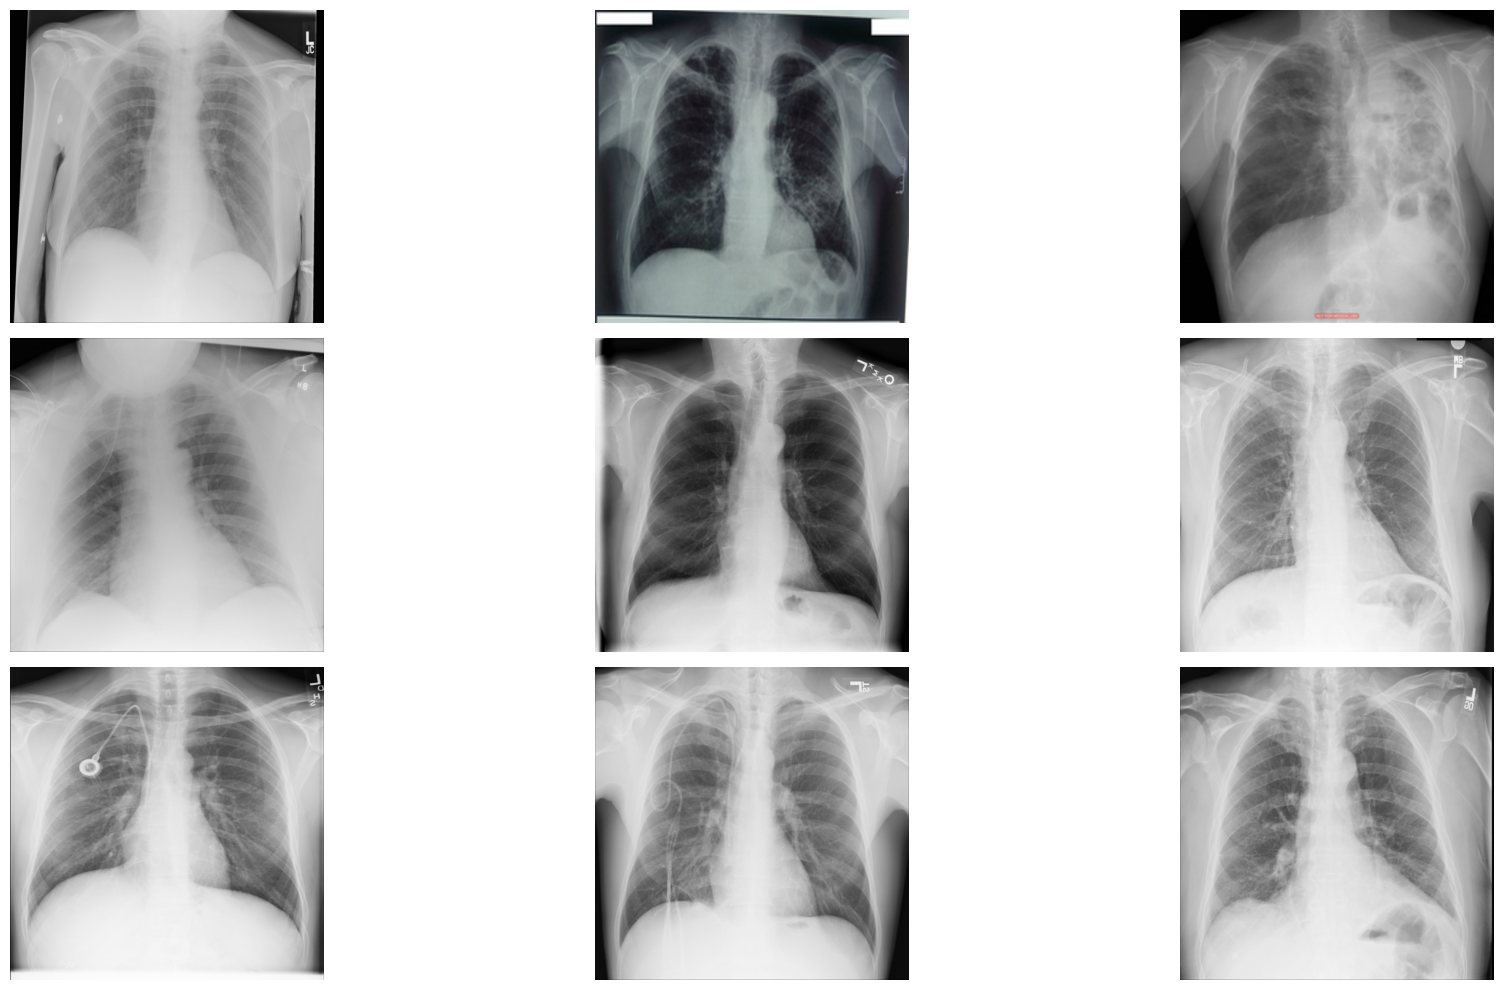

In [ ]:
train1 = os.listdir("/content/Full_Data/train")
train1_dir = "/content/Full_Data/train"

print("Tập train: \n")

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(train1_dir, train1[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()

In ra 10 ảnh đầu tiên trong tập test để kiểm tra.

Tập test: 



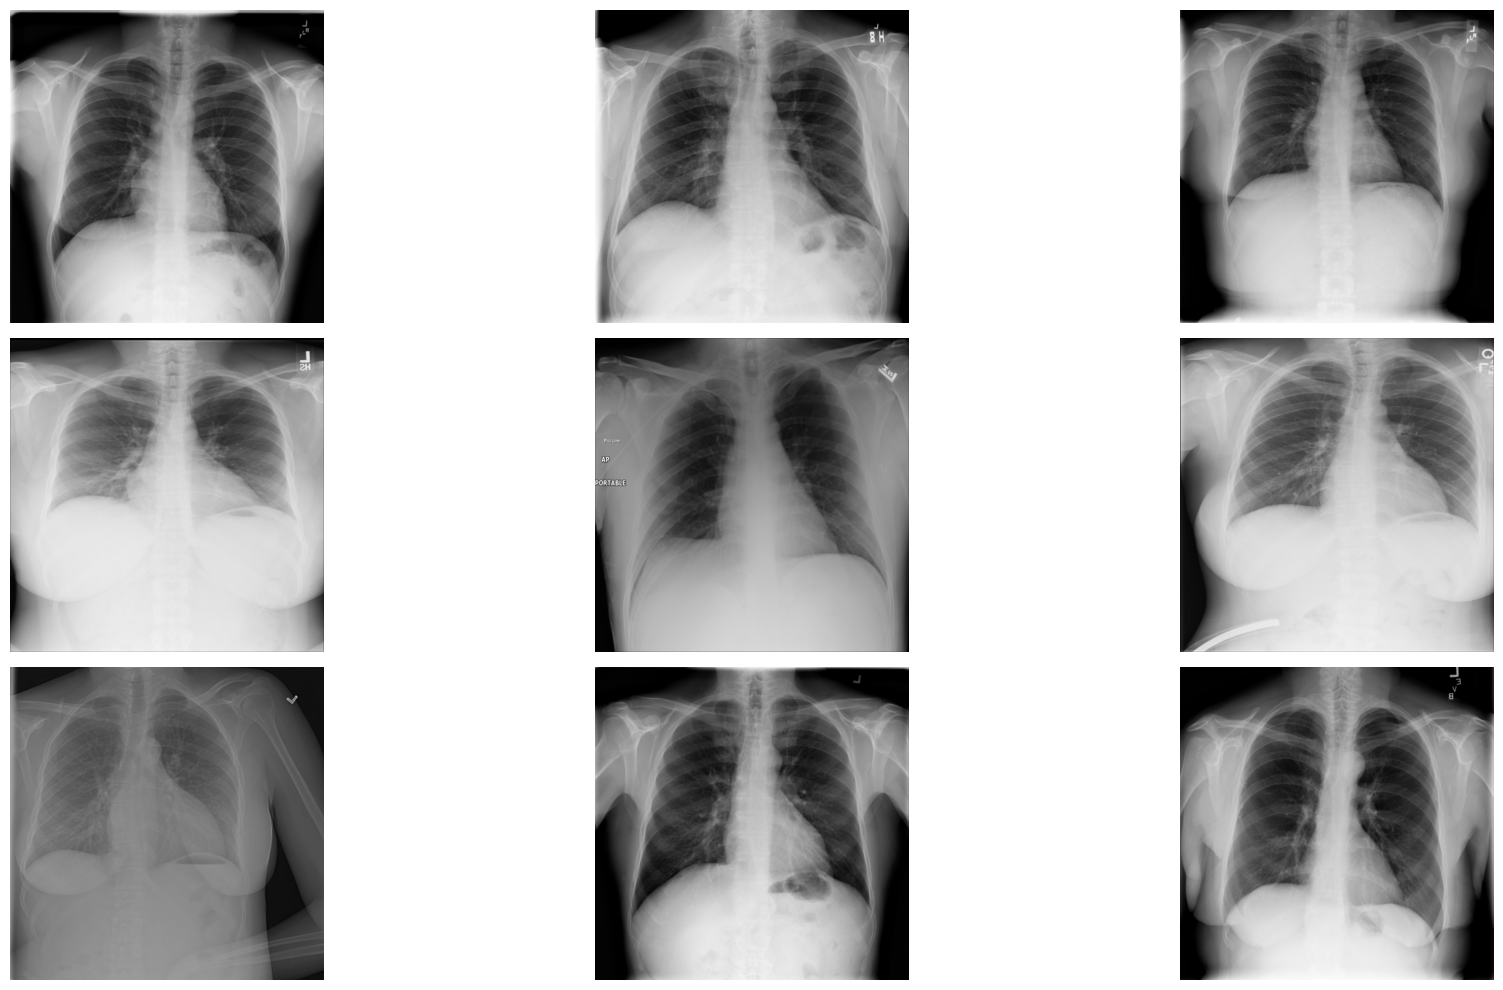

In [ ]:
test1 = os.listdir("/content/Full_Data/test")
test1_dir = "/content/Full_Data/test"

print("Tập test: \n")

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(test1_dir, test1[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()

Với mục tiêu là áp dụng transfer learning để phân loại ảnh, Các bước thực hiện sẽ được áp dụng như sau:
1. Đầu tiên là tiếp tục chia tiếp tập train thành 2 tập train và val, ta sẽ coi đây là 2 tập chính để áp dụng cho việc train model, còn với tập test, ta sẽ tiếp tục sử dụng tập test đã được đầu tiên ở phía trên để đánh giá model.
2. Ta sẽ train CNN model trước với các tập dữ liệu đã được chia phía trên và đưa ra hiệu suất khi áp dụng CNN thuần.
3. Sau đó ta sẽ áp dụng transfer learning với VGG16 model đã được huấn luyện từ tước và huấn luyện với 3 bộ dữ liệu được chia gồm tập train, test và val và cuối cùng sẽ là đánh giá hiệu suất sau khi đã được huấn luyện.
4. Cuối cùng là ta sẽ đánh giá xem 2 model sau khi train sẽ có hiệu suất như thế nào.

Đầu tiên ta sẽ xây 1 lớp là CustomDataset nhằm dùng cho mục đích chia dữ liệu để phục vụ cho việc huấn luyện mô hình.
+ Với tập train đã được chia từ lúc đầu, ta sẽ chia theo tỷ lệ 8 2 để tạo ra tập train và tập validation cuối cùng phục vụ cho việc huấn luyện mô hình.
+ Còn với tập test, ta sẽ sử dụng lại tập test đã được chia phía trên để áp dụng cho việc kiểm tra việc phân loại của mô hình dựa trên confussion matrix.

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, data_folder, file_list, transform=None):
        self.data_folder = data_folder
        self.file_list = file_list
        self.transform = transform

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img_name = os.path.join(self.data_folder, self.file_list[idx])
        image = Image.open(img_name).convert('RGB')

        if self.transform:
            image = self.transform(image)

        label = self.extract_label_from_filename(self.file_list[idx])
        return image, label

    def extract_label_from_filename(self, filename):
        parts = filename.split("-")
        label_str = parts[0]
        label = self.map_label_to_integer(label_str)
        return torch.tensor(label, dtype=torch.long)

    def map_label_to_integer(self, label_str):
        label_mapping = {'Tuberculosis': 0, 'Normal': 1}
        return label_mapping[label_str]

# Đường dẫn đến thư mục chứa dữ liệu
train_dir = "/content/Full_Data/train"
test_dir = "/content/Full_Data/test"

# Kiểm tra và tạo thư mục nếu chưa tồn tại
for dir_path in [train_dir, test_dir]:
    if not os.path.exists(dir_path):
        raise FileNotFoundError(f"Directory not found: {dir_path}")

# Lấy danh sách tất cả các tệp tin trong thư mục
file_list = os.listdir(train_dir)

# Lấy danh sách tất cả các tệp tin trong thư mục tập test
file_list_test = os.listdir(test_dir)

# Chia danh sách tệp tin thành tập train và tập val
train_files, val_files = train_test_split(file_list, test_size=0.2, shuffle=True, random_state=42)

# Định nghĩa các phép biến đổi (transforms) cho dữ liệu
_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Tạo đối tượng Dataset cho tập huấn luyện, tập validation, và tập kiểm thử
train_dataset = CustomDataset(train_dir, train_files, transform=_transform)
val_dataset = CustomDataset(train_dir, val_files, transform=_transform)
test_dataset = CustomDataset(test_dir, file_list_test, transform=_transform)  # Hoặc có thể sử dụng một transform khác cho tập kiểm thử

# Tạo DataLoader cho tập huấn luyện, tập validation, và tập kiểm thử cho CNN_Custom
batch_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Tạo Dataloader cho tập huấn luyện, tập validation, và tập kiểm thử cho VGG16 model
train_loader_VGG16 = train_loader
val_loader_VGG16 = val_loader
test_loader_VGG16 = test_loader

Kiểm tra thử tập train mới nhất dùng để huấn luyện đã được chia hay chưa

In [ ]:
print(len(train_dataset))


2688


Để huấn luyện được model và đánh giá được khả năng phân loại thì cần phải có dataloader của các tập train test và val. Nên ta sẽ thử kiểm tra xem các tập đó đã được load thành công hay chưa bằng cách visual lên thông tin của 10 ảnh đầu tiên trong tập.

In ra thông tin của 10 ảnh đầu tiên trong tập train_loader và trực quan hóa của 10 ảnh đó lên.

Image 1 - Label: 1
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32
Image 2 - Label: 1
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32
Image 3 - Label: 1
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32
Image 4 - Label: 1
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32
Image 5 - Label: 1
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32
Image 6 - Label: 1
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32
Image 7 - Label: 1
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32
Image 8 - Label: 0
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32
Image 9 - Label: 0
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32
Image 10 - Label: 1
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32


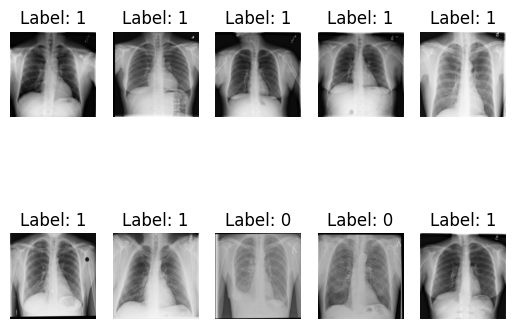

In [ ]:
# Lấy một batch dữ liệu từ DataLoader
batch_images, batch_labels = next(iter(train_loader))

# Hiển thị 10 ảnh đầu tiên
num_images_to_display = 10
for i in range(min(num_images_to_display, len(batch_images))):
    plt.subplot(2, 5, i + 1)  # Sắp xếp các hình ảnh thành 2 hàng, 5 cột
    image = batch_images[i]
    label = batch_labels[i].item()

    # In thông tin của ảnh
    print(f"Image {i + 1} - Label: {label}")
    print(f"Image size: {image.size()}")
    print(f"Image data type: {image.dtype}")

    #Hiển thị ảnh lên
    plt.imshow(np.transpose(batch_images[i], (1, 2, 0)))
    plt.title(f"Label: {batch_labels[i].item()}")
    plt.axis('off')

plt.show()

In ra thông tin của 10 ảnh đầu tiên trong tập test_loader và trực quan hóa của 10 ảnh đó lên.

Image 1 - Label: 1
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32
Image 2 - Label: 1
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32
Image 3 - Label: 1
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32
Image 4 - Label: 1
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32
Image 5 - Label: 1
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32
Image 6 - Label: 1
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32
Image 7 - Label: 1
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32
Image 8 - Label: 1
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32
Image 9 - Label: 1
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32
Image 10 - Label: 1
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32


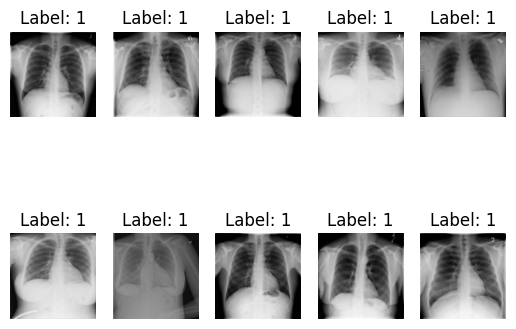

In [ ]:
# Lấy một batch dữ liệu từ DataLoader
batch_images, batch_labels = next(iter(test_loader))

# Hiển thị 10 ảnh đầu tiên
num_images_to_display = 10
for i in range(min(num_images_to_display, len(batch_images))):
    plt.subplot(2, 5, i + 1)  # Sắp xếp các hình ảnh thành 2 hàng, 5 cột
    image = batch_images[i]
    label = batch_labels[i].item()

    # In thông tin của ảnh
    print(f"Image {i + 1} - Label: {label}")
    print(f"Image size: {image.size()}")
    print(f"Image data type: {image.dtype}")

    #Hiển thị ảnh lên
    plt.imshow(np.transpose(batch_images[i], (1, 2, 0)))
    plt.title(f"Label: {batch_labels[i].item()}")
    plt.axis('off')

plt.show()


In ra thông tin của 10 ảnh đầu tiên trong tập val_loader và trực quan hóa của 10 ảnh đó lên.

Image 1 - Label: 0
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32
Image 2 - Label: 1
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32
Image 3 - Label: 0
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32
Image 4 - Label: 1
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32
Image 5 - Label: 1
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32
Image 6 - Label: 1
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32
Image 7 - Label: 1
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32
Image 8 - Label: 1
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32
Image 9 - Label: 1
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32
Image 10 - Label: 1
Image size: torch.Size([3, 224, 224])
Image data type: torch.float32


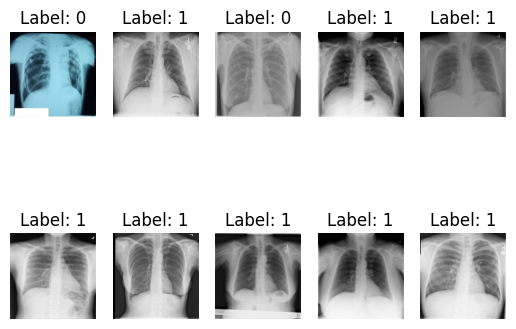

In [ ]:
# Lấy một batch dữ liệu từ DataLoader
batch_images, batch_labels = next(iter(val_loader))

# Hiển thị 10 ảnh đầu tiên
num_images_to_display = 10
for i in range(min(num_images_to_display, len(batch_images))):
    plt.subplot(2, 5, i + 1)  # Sắp xếp các hình ảnh thành 2 hàng, 5 cột
    image = batch_images[i]
    label = batch_labels[i].item()

    # In thông tin của ảnh
    print(f"Image {i + 1} - Label: {label}")
    print(f"Image size: {image.size()}")
    print(f"Image data type: {image.dtype}")

    #Hiển thị ảnh lên
    plt.imshow(np.transpose(batch_images[i], (1, 2, 0)))
    plt.title(f"Label: {batch_labels[i].item()}")
    plt.axis('off')

plt.show()


Đầu tiên sẽ là CNN model thuần, ta sẽ xây dựng CNN model với 2 lớp tích chập để áp dụng cho việc phân loại ảnh.
+ Ta có 2 lớp nên khi khởi tạo mô hình ta sẽ đưa đúng số lớp cần thực hiện cho model.
+ Ta sẽ có các mảng dùng để lưu lại các giá trị mất mát cũng như là độ chính xác sau mỗi lần huấn luyện 1 epoch.
+ Trong model này, khi được huấn luyện sẽ có tất cả là 10 epoch để huấn luyện.
+ Và sau khi đã huấn luyện xong, ta sẽ chuyển sang chế độ đánh giá và đánh giá tập test để đánh giá được độ chính xác cuối cùng của tập test.
+ Sau khi đã hoàn thành xong việc huấn luyện, ta có thể thấy đầu ra của mô hình có kết quả khả quan, chỉ số cao gần như là tuyệt đối.

In [ ]:
# Định nghĩa mô hình CNN
class CustomCNN(nn.Module):
    def __init__(self, num_classes):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(128 * 56 * 56, 512)
        self.relu3 = nn.ReLU()

        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(-1, 128 * 56 * 56)
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        return x

# Khởi tạo mô hình
num_classes = 2
model = CustomCNN(num_classes)

# Sử dụng GPU nếu có
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Định nghĩa hàm loss và optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Khởi tạo danh sách để lưu trữ giá trị
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Huấn luyện mô hình
num_epochs = 10
for epoch in range(num_epochs):
    model.train()  # Chuyển sang chế độ huấn luyện

    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Tính toán loss và accuracy trên tập huấn luyện
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    # Tính toán loss và accuracy trung bình trên tập huấn luyện
    epoch_loss = running_loss / total_samples
    epoch_accuracy = correct_predictions / total_samples

    # Lưu vào danh sách
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    # Đánh giá mô hình trên tập validation
    model.eval()  # Chuyển sang chế độ đánh giá
    total_correct = 0
    total_samples = 0

    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)

            val_outputs = model(val_inputs)
            _, predicted = torch.max(val_outputs, 1)
            total_correct += (predicted == val_labels).sum().item()
            total_samples += val_labels.size(0)

    accuracy = total_correct / total_samples
    print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_accuracy:.4f}, Validation Accuracy: {accuracy:.4f}")

    # Lưu giá trị để phác thảo
    val_loss = 0.0
    val_correct_predictions = 0
    val_total_samples = 0

    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)

            val_outputs = model(val_inputs)
            val_loss += criterion(val_outputs, val_labels).item() * val_inputs.size(0)

            _, val_predicted = torch.max(val_outputs, 1)
            val_correct_predictions += (val_predicted == val_labels).sum().item()
            val_total_samples += val_labels.size(0)

    val_loss /= val_total_samples
    val_accuracy = val_correct_predictions / val_total_samples

    # Lưu vào danh sách
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

# Đánh giá mô hình trên tập test
model.eval()  # Chuyển sang chế độ đánh giá
total_correct_test = 0
total_samples_test = 0

with torch.no_grad():
    for test_inputs, test_labels in test_loader:
        test_inputs, test_labels = test_inputs.to(device), test_labels.to(device)

        test_outputs = model(test_inputs)
        _, test_predicted = torch.max(test_outputs, 1)
        total_correct_test += (test_predicted == test_labels).sum().item()
        total_samples_test += test_labels.size(0)

#In kết quả trên tập kiểm thử
tmp_accuracy_CNN = (total_correct_test / total_samples_test) * 100
test_accuracy_CNN = tmp_accuracy_CNN
print( f"Test Accuracy CNN model: {tmp_accuracy_CNN:.2f}%")

print("Training finished.")

Epoch 1/10, Training Loss: 0.5198, Training Accuracy: 0.8880, Validation Accuracy: 0.9554
Epoch 2/10, Training Loss: 0.1033, Training Accuracy: 0.9635, Validation Accuracy: 0.9702
Epoch 3/10, Training Loss: 0.0732, Training Accuracy: 0.9788, Validation Accuracy: 0.9658
Epoch 4/10, Training Loss: 0.0521, Training Accuracy: 0.9859, Validation Accuracy: 0.9747
Epoch 5/10, Training Loss: 0.0331, Training Accuracy: 0.9896, Validation Accuracy: 0.9881
Epoch 6/10, Training Loss: 0.0180, Training Accuracy: 0.9944, Validation Accuracy: 0.9777
Epoch 7/10, Training Loss: 0.0149, Training Accuracy: 0.9948, Validation Accuracy: 0.9762
Epoch 8/10, Training Loss: 0.0118, Training Accuracy: 0.9963, Validation Accuracy: 0.9807
Epoch 9/10, Training Loss: 0.0022, Training Accuracy: 1.0000, Validation Accuracy: 0.9807
Epoch 10/10, Training Loss: 0.0026, Training Accuracy: 0.9996, Validation Accuracy: 0.9836
Test Accuracy CNN model: 98.57%
Training finished.


Sau khi đã huấn luyện xong và đã có được các giá trị mất mát cũng như là độ chính xác của từng epoch thì ta sẽ bắt đầu phác họa lên thành biểu đồ.
+ Biểu đồ sẽ vẽ lên đường đi của các giá trị mà ta đã lưu trước đó. Đối với biểu đồ mất mát, ta thấy từ epoch đầu tiên đã thấy chiều hướng giảm dần khá nhanh.
+ Sau đó, với các epoch phía sau, thì việc giảm dần xảy ra chậm hơn nhưng vẫn có chiều hướng giảm. Đồng nghĩa với việc mất mát khi train đã giảm.
+ Còn với biểu đồ độ chính xác, ta thấy sau khi qua epoch đầu tiên thì tăng lên rất nhanh, còn với các epoch sau thì vẫn tăng nhưng với độ thay đổi tăng chậm hơn. Ta thấy độ giao động của cả 2 biểu đồ là không nhiều.

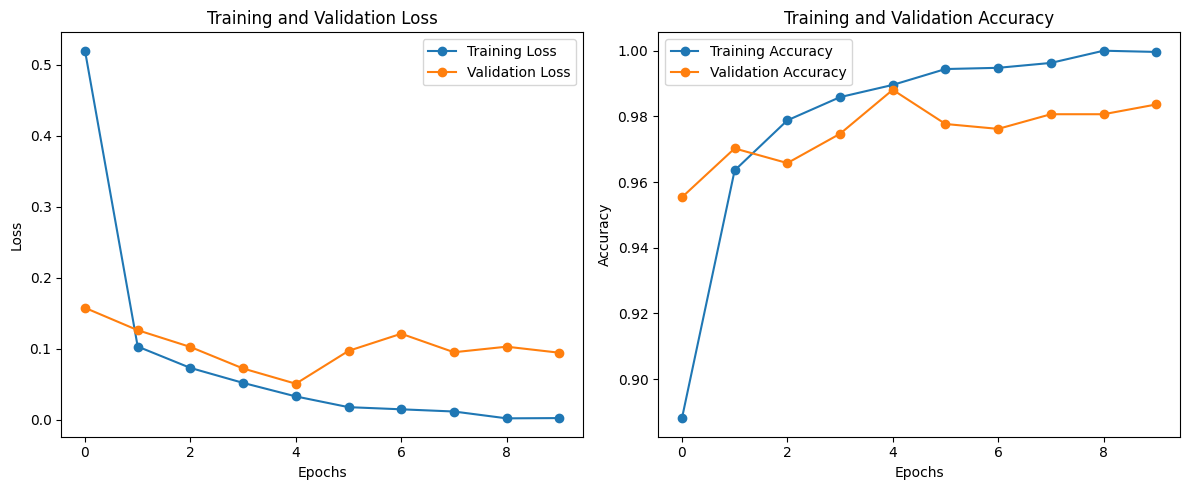

In [ ]:
# Phác thảo Loss trên tập huấn luyện và tập validation
plt.figure(figsize=(12, 5))

# Loss trên tập huấn luyện
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', marker='o')
plt.plot(val_losses, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy trên tập huấn luyện
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', marker='o')
plt.plot(val_accuracies, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

- Với ma trận hỗn loạn (confusion matrix), ta có thể nhận thấy được ở precision và recall rất cao, gần như là cực đại nên có thể thấy mô hình sau khi huấn luyện đã cho ra được chỉ số khá cao. Như vậy, với mô hình CNN thuần khi được xây dựng cũng đã đưa ra được 1 kết quả vô cùng khả quan khi việc phân loại sai vô cùng thấp.

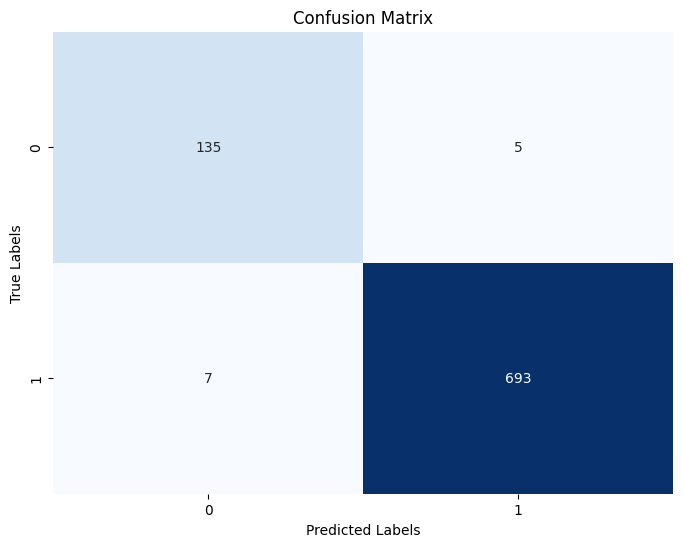

Classification Report:
               precision    recall  f1-score   support

Tuberculosis       0.95      0.96      0.96       140
      normal       0.99      0.99      0.99       700

    accuracy                           0.99       840
   macro avg       0.97      0.98      0.97       840
weighted avg       0.99      0.99      0.99       840



In [ ]:
# Đặt mô hình vào chế độ đánh giá
model.eval()

# Dự đoán nhãn trên tập test
all_predictions = []
all_labels = []

with torch.no_grad():
    for test_inputs, test_labels in test_loader:
        test_inputs, test_labels = test_inputs.to(device), test_labels.to(device)
        test_outputs = model(test_inputs)
        _, predicted = torch.max(test_outputs, 1)

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(test_labels.cpu().numpy())

# Xây dựng Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

# In Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# In báo cáo đánh giá
class_names = [str(i) for i in range(num_classes)]  # Đổi tên các lớp nếu cần
# Đổi tên các lớp nếu cần
class_names = ["Tuberculosis", "normal"]
report = classification_report(all_labels, all_predictions, target_names=class_names)
print("Classification Report:\n", report)

**Áp dụng Transfer Learning**

Tiếp theo là áp dụng transfer learning với mô hình là VGG16, ta sẽ áp dụng như sau:
+ Trước tiên là tải mô hình đã được train về và đóng băng các layers của mô hình, thay thế phần đầu ra để phù hợp với số lớp của bộ dữ liệu đó là 2 lớp.
+ Ta sẽ có 4 mảng tất cả để lưu trữ các giá trị mất mát của tập train và val cũng như là các giá trị chính xác để tiện cho việc trực quan hóa nó lên để kiểm tra.
+ Sau đó là bắt đầu huấn luyện mô hình để đưa ra được các giá trị mất mát và độ chính xác của mô hình sau mỗi epoch huấn luyện.
+ Và cuối cùng là sẽ đưa ra được độ chính xác cuối cùng của tập test.
+ Có thể thấy, sau khi huấn luyện thì mô hình đã đưa ra được kết quả khá tốt.

In [ ]:
# Sử dụng GPU nếu có sẵn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Tải mô hình VGG16 với trọng số được đào tạo trước
vgg16_model = models.vgg16(pretrained=True)

# Đóng băng các layers của mô hình VGG16
for param in vgg16_model.parameters():
    param.requires_grad = False

# Thay thế phần đầu ra của mô hình để phù hợp với số lớp của bạn (ở đây, 2 lớp cho 'Tuberculosis' và 'Normal')
num_features = vgg16_model.classifier[6].in_features
vgg16_model.classifier[6] = nn.Linear(num_features, 2)

# Chuyển mô hình sang GPU nếu có sẵn
vgg16_model = vgg16_model.to(device)

# Định nghĩa hàm loss và optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg16_model.parameters(), lr=0.001, momentum=0.9)

# Lists để lưu trữ thông tin đánh giá qua các epoch
train_losses_VGG16 = []
train_accuracies_VGG16 = []
val_losses_VGG16 = []
val_accuracies_VGG16 = []

# Huấn luyện mô hình
num_epochs = 10
for epoch in range(num_epochs):
    vgg16_model.train()
    train_loss = 0.0
    corrects_train = 0
    total_train = 0
    for inputs, labels in train_loader_VGG16:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = vgg16_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        _, predicted_train = torch.max(outputs, 1)
        total_train += labels.size(0)
        corrects_train += (predicted_train == labels).sum().item()

    train_accuracy_VGG16 = corrects_train / total_train
    train_losses_VGG16.append(train_loss / len(train_loader_VGG16))
    train_accuracies_VGG16.append(train_accuracy_VGG16)

    # Đánh giá mô hình trên tập validation
    vgg16_model.eval()
    val_loss = 0.0
    corrects_val = 0
    total_val = 0
    with torch.no_grad():
        for inputs, labels in val_loader_VGG16:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = vgg16_model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted_val = torch.max(outputs, 1)
            total_val += labels.size(0)
            corrects_val += (predicted_val == labels).sum().item()

    # Lưu thông tin đánh giá cho việc vẽ đồ thị
    val_losses_VGG16.append(val_loss / len(val_loader_VGG16))
    val_accuracy_VGG16 = corrects_val / total_val
    val_accuracies_VGG16.append(val_accuracy_VGG16)

    # In thông tin đánh giá
    print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {(train_loss / len(train_loader_VGG16)): .4f}, Train Accuracy: {train_accuracy_VGG16: .4f}, Val Loss: {(val_loss / len(val_loader_VGG16)): .4f}, Val Accuracy: {(val_accuracy_VGG16): .4f}')

# Đánh giá mô hình trên tập kiểm thử
vgg16_model.eval()
test_corrects = 0
test_total = 0
with torch.no_grad():
    for inputs, labels in test_loader_VGG16:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = vgg16_model(inputs)
        _, predicted = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_corrects += (predicted == labels).sum().item()

# In kết quả đánh giá trên tập kiểm thử
tmp_accuracy_VGG16 = (test_corrects / test_total) * 100
test_accuracy_VGG16 = tmp_accuracy_VGG16
print(f"Test Accuracy VGG16: {tmp_accuracy_VGG16:.2f}%")

print(f'Training finished.')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Train Loss:  0.2638, Train Accuracy:  0.8888, Val Loss:  0.1834, Val Accuracy:  0.9271
Epoch 2/10, Train Loss:  0.1710, Train Accuracy:  0.9319, Val Loss:  0.1554, Val Accuracy:  0.9449
Epoch 3/10, Train Loss:  0.1530, Train Accuracy:  0.9435, Val Loss:  0.1409, Val Accuracy:  0.9509
Epoch 4/10, Train Loss:  0.1400, Train Accuracy:  0.9475, Val Loss:  0.1275, Val Accuracy:  0.9524
Epoch 5/10, Train Loss:  0.1287, Train Accuracy:  0.9513, Val Loss:  0.1214, Val Accuracy:  0.9583
Epoch 6/10, Train Loss:  0.1225, Train Accuracy:  0.9554, Val Loss:  0.1168, Val Accuracy:  0.9613
Epoch 7/10, Train Loss:  0.1238, Train Accuracy:  0.9535, Val Loss:  0.1103, Val Accuracy:  0.9598
Epoch 8/10, Train Loss:  0.1225, Train Accuracy:  0.9483, Val Loss:  0.1118, Val Accuracy:  0.9568
Epoch 9/10, Train Loss:  0.1155, Train Accuracy:  0.9568, Val Loss:  0.1161, Val Accuracy:  0.9583
Epoch 10/10, Train Loss:  0.1121, Train Accuracy:  0.9580, Val Loss:  0.1090, Val Accuracy:  0.9598
Test Accu

Cũng như là CNN model, ta có thể thấy được:
+ Các giá trị mất mát sẽ giảm từ từ qua mỗi epoch huấn luyện.
+ Các giá trị chính xác được tăng lên sau mỗi epoch huấn luyện.
+ Có thể thấy độ giao động của các đường gần như không nhiều mà khá là bằng phẳng.

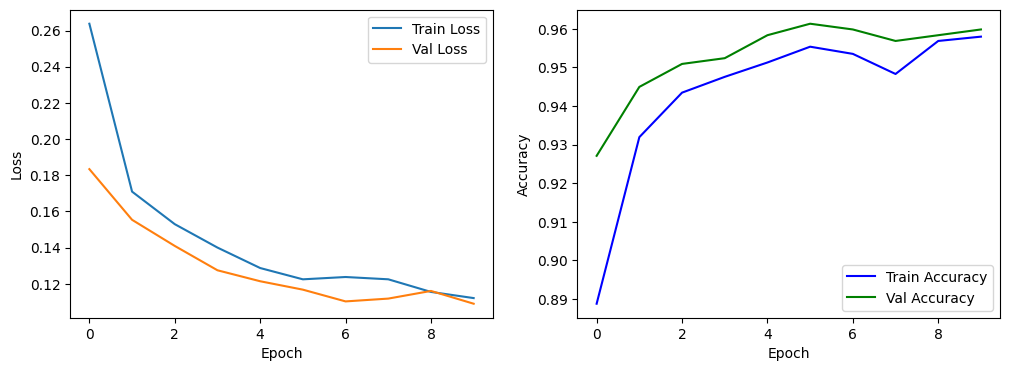

In [ ]:
# Vẽ đồ thị
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses_VGG16, label='Train Loss')
plt.plot(val_losses_VGG16, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies_VGG16, label='Train Accuracy', color='blue')
plt.plot(val_accuracies_VGG16, label='Val Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

- Cũng như là CNN model, ta có thể thấy được VGG16 hoạt động khá tốt, nó đã cho ra được kết quả rất khả quan với precision và recall vô cùng cao. Nó cho thấy được khả năng phân loại khi áp dụng mô hình là rất hiệu quả.

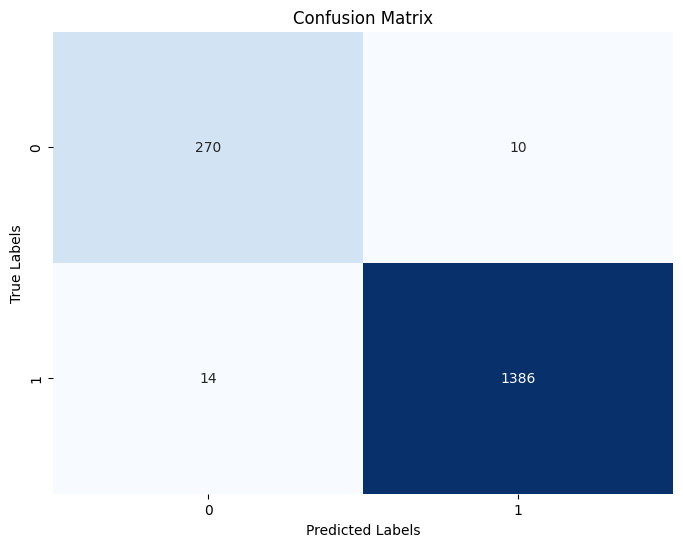

Classification Report:
               precision    recall  f1-score   support

Tuberculosis       0.95      0.96      0.96       280
      normal       0.99      0.99      0.99      1400

    accuracy                           0.99      1680
   macro avg       0.97      0.98      0.97      1680
weighted avg       0.99      0.99      0.99      1680



In [ ]:
# Đặt mô hình vào chế độ đánh giá
vgg16_model.eval()

# Dự đoán nhãn trên tập test
all_predictions_VGG16 = []
all_labels_VGG16 = []

with torch.no_grad():
    for test_inputs, test_labels in test_loader_VGG16:
        test_inputs, test_labels = test_inputs.to(device), test_labels.to(device)
        test_outputs = model(test_inputs)
        _, predicted = torch.max(test_outputs, 1)

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(test_labels.cpu().numpy())

# Xây dựng Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

# In Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# In báo cáo đánh giá
class_names = [str(i) for i in range(num_classes)]  # Đổi tên các lớp nếu cần
# Đổi tên các lớp nếu cần
class_names = ["Tuberculosis", "normal"]
report = classification_report(all_labels, all_predictions, target_names=class_names)
print("Classification Report:\n", report)

Ở đây ta sẽ so sánh:
+ Các giá trị mất mát của tập train của CNN model và tập train của VGG16 model.
+ Các giá trị chính xác tập train của CNN model và tập train của VGG16 model.

Kết quả:
+ Có thể thấy CNN model sẽ có giá trị mất mát sau mỗi epoch sẽ thấp hơn so với bên VGG16 model.
+ Còn với các giá trị chính xác thì CNN model cũng trội hơn so với VGG16 model.

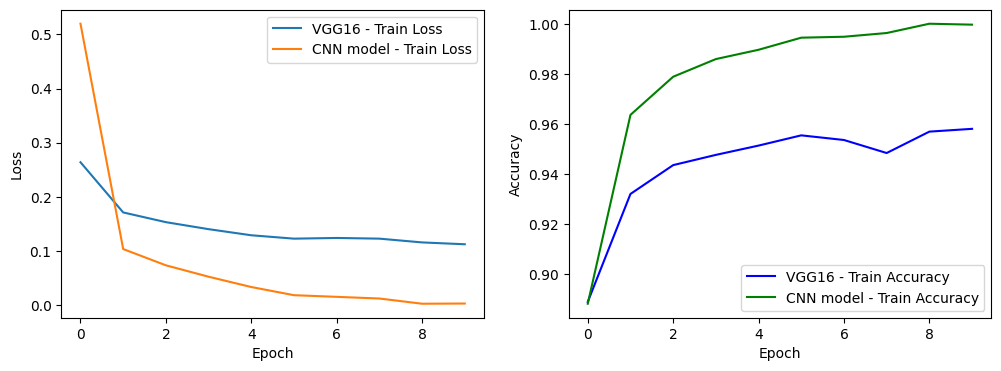

In [ ]:
# Vẽ đồ thị
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses_VGG16, label='VGG16 - Train Loss')
plt.plot(train_losses, label='CNN model - Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies_VGG16, label='VGG16 - Train Accuracy', color='blue')
plt.plot(train_accuracies, label='CNN model - Train Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Với cái test accuracy giữa 2 model:
+ Có thể thấy cột CNN sẽ cao hơn 1 chút so với VGG16.
+ Lý có có thể là do kết cấu của VGG16 có kết cấu phức tạp nên có thể khi áp dụng với bộ dữ liệu trên là phân biệt có viêm phổi hay không thì có thể bộ dữ liệu quá đơn giản nên hiệu suất cho ra sau khi huấn luyện sẽ không bằng được CNN.

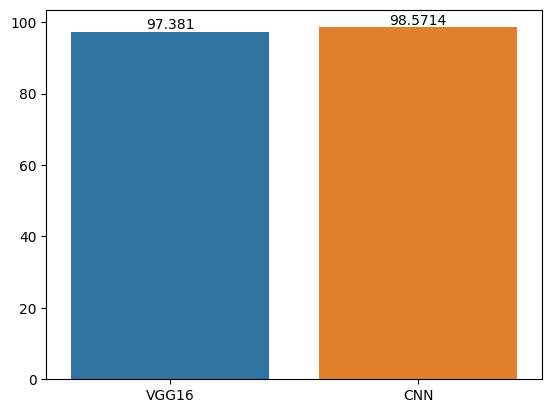

In [ ]:
# Dữ liệu mẫu
categories = ['CNN model','VGG16 model']

test_accuracy_CNN
test_accuracy_VGG16

DF = pd.DataFrame({'VGG16': [test_accuracy_VGG16], 'CNN': [test_accuracy_CNN]}, index=['accuracy'], dtype='float')
# DF.head()
ax= sns.barplot(data=DF)
for i in ax.containers:
  ax.bar_label(i, )
# Tạo index cho các cột
# index = np.arange(len(categories))

# # Vẽ biểu đồ cột cho mảng thứ nhất
# plt.bar(index, test_accuracy_CNN, label='Array 1', color='blue')

# # Vẽ biểu đồ cột cho mảng thứ hai, offset để nó không chồng lên mảng thứ nhất
# plt.bar(index, test_accuracy_VGG16, label='Test', color='orange')

# # Thêm tiêu đề và nhãn trục
# plt.title('Biểu đồ Cột Cho Hai Mảng')
# plt.xlabel('Danh mục')
# plt.ylabel('Giá trị')

# # Thêm chú thích và hiển thị biểu đồ
# plt.legend()
# plt.show()
